# XGBoost Model for fraud Detection

## Imports 

In [1]:
!pip install scikit-learn

In [2]:
!pip install graphviz

In [3]:
import sklearn
print(sklearn.__version__)

1.1.0


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn import metrics


## Loading the data 

In [5]:
df = pd.read_csv("preprocessed_data.csv")

## The model 1

In [6]:
model = XGBClassifier(random_state=42, eval_metric='auc',
              objective='binary:logistic')


In [7]:
df.columns = [x.lower() for x in df.columns]

y = df['flag']
df = df.drop("flag", axis = 1)
X = df
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

X_train = X_train.drop("index", axis =1) 
X_train = X_train.drop("address", axis =1) 

X_test = X_test.drop("index", axis =1) 
X_test = X_test.drop("address", axis =1) 

X_test.shape

(3240, 34)

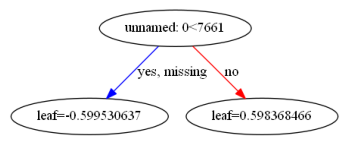

In [8]:
model.fit(X_train, y_train)
plot_tree(model)
plt.show()

## The model 2

In [10]:
pipeline = Pipeline([
    ('learning', XGBClassifier(random_state=42, eval_metric='auc',
              objective='binary:logistic') )
])

In [11]:
# droping the columns index and adress as they can't be used for training 

df.columns = [x.lower() for x in df.columns]

y = df['flag']
df = df.drop("flag", axis = 1)
X = df
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

X_train = X_train.drop("index", axis =1) 
X_train = X_train.drop("address", axis =1) 

X_test = X_test.drop("index", axis =1) 
X_test = X_test.drop("address", axis =1) 

X_test.shape

(3240, 34)

## Training 

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('learning',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

In [13]:
from sklearn.model_selection import cross_val_score

#X_test.columns = X_test.columns.str.replace('[_]', ' ')
  
test_prediction = pipeline.predict_proba(X_test)[:,1]

score = metrics.roc_auc_score(y_test, test_prediction)

print(f'Area under ROC of Model On Test Set - {score:,.2%}')

Area under ROC of Model On Test Set - 99.98%


C:\Users\tziya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


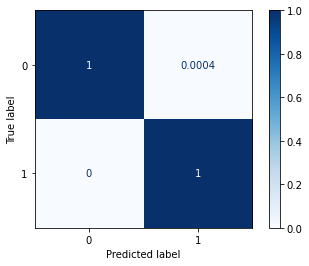

In [14]:
test_prediction = pipeline.predict(X_test)

disp = metrics.plot_confusion_matrix(pipeline, X_test, y_test,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

AttributeError: 'Pipeline' object has no attribute 'get_dump'

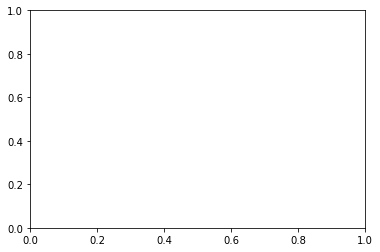